In [36]:
import numpy as np
import timeit

def loadData():
    import csv

    var = []

    # dataFile = open('CS205_large_testdata__40.txt', 'r')
    # dataFile = open('./Qualitative_Bankruptcy/Qualitative_Bankruptcy.data.txt', 'r')
    # dataFile = open('CS205_small_testdata__34.txt', 'r')
    dataFile = open('./spambase/spambase.txt', 'r')
    # dataFile = open('turkiye-student-evaluation_generic.csv', 'r')
    # dataFile = open('./test_set/CS170_small_special_testdata__97.txt', 'r')
    # data = csv.reader(dataFile, delimiter=' ', skipinitialspace=True)
    data = csv.reader(dataFile, delimiter=',' , skipinitialspace=True)
    # next(data)
    for row in data:
        var.append(row)
    dataFile.close()

    return var

X = np.array(loadData())
X = X.astype(np.float)

In [37]:
from sklearn import preprocessing

# Swap 57th column with first column
X[:, [57, 0]] = X[:, [0, 57]]
# Shuffle data
np.random.shuffle(X)
# Reduce data
X = X[:-3600, :]
# Normalize data
# X = preprocessing.normalize(X)

In [18]:
import copy

def leaveOneOut(data, current_set, feature_to_add):
    total_set = copy.deepcopy(current_set)
    total_set.append(feature_to_add)
    total_set.insert(0, 0)
    
    modified_data = data[:, total_set]
    m = len(modified_data)
    number_correctly_classified = 0

    for i in range(m):
        object_to_classify = modified_data[i,1:]
        label_object_to_classify = modified_data[i,0]

        nearest_neighbor_distance = float('inf')
        nearest_neighbor_location = float('inf')
        nearest_neighbor_label = 0
        for j in range(m):
            if j != i:
                distance = np.sqrt(np.sum(np.square(object_to_classify - modified_data[j,1:])))
                if distance < nearest_neighbor_distance:
                    nearest_neighbor_distance = distance
                    nearest_neighbor_location = j
                    nearest_neighbor_label = modified_data[j,0]
        if label_object_to_classify == nearest_neighbor_label:
            number_correctly_classified += 1
    
    accuracy = number_correctly_classified / m
    return accuracy


In [174]:
# Testing for leave one out function
# Replace hard coded values with expected best features
acc = leaveOneOut(X, [], 7)
print("This is acc for ", 7 ," : ", acc)
acc = leaveOneOut(X, [7], 4)
print("This is acc for 7,4 : ", acc)
acc = leaveOneOut(X, [7,4], 6)
print("This is acc for 7,4,6 : ", acc)

This is acc for  7  :  0.82
This is acc for 7,4 :  0.8233333333333334
This is acc for 7,4,6 :  0.92


In [20]:
def featureSearch(data):
    current_set_of_features = []
    best_overall_accuracy = 0
    best_overall_features = []
    m = len(data[0])
    set_of_all_features = []
    set_of_all_accuracies = []

    print("Beginning search.")
    start = timeit.default_timer()
    for i in range(m-1):
        print("On the ", i, " level of the search tree")
        feature_to_add_at_this_level = -1
        best_so_far_accuracy = 0
        for j in range(m-1):
            if j+1 not in current_set_of_features:
                accuracy = leaveOneOut(data, current_set_of_features, j+1)
                print("Using feature(s) ", current_set_of_features," and ", j+1 ," accuracy is ", accuracy)
                if accuracy > best_so_far_accuracy:
                    best_so_far_accuracy = accuracy
                    feature_to_add_at_this_level = j+1
        
        current_set_of_features.append(feature_to_add_at_this_level)
        set_of_all_accuracies.append(best_so_far_accuracy)

        if best_so_far_accuracy > best_overall_accuracy:
            best_overall_accuracy = best_so_far_accuracy
            best_overall_features = copy.deepcopy(current_set_of_features)
        else:
            print("Warning accuracy has decreased! Continuing search in case of local maxima")
        
        set_of_all_features.append(copy.deepcopy(current_set_of_features))
        print("On level ", i, " I added feature ", feature_to_add_at_this_level, " to the current set")
        print("This gives us an accuracy of ", best_so_far_accuracy, " with features ", current_set_of_features)
        stop = timeit.default_timer()
        print('Time taken to run: ', stop-start)

    print("Finished search! Best feature subset is ", best_overall_features, " with accuracy of ", best_overall_accuracy)
    return (set_of_all_features, set_of_all_accuracies)
    


In [38]:
(forwardX, forwardY) = featureSearch(X)

Beginning search.
On the  0  level of the search tree
Using feature(s)  []  and  1  accuracy is  0.6593406593406593
Using feature(s)  []  and  2  accuracy is  0.6693306693306693
Using feature(s)  []  and  3  accuracy is  0.6043956043956044
Using feature(s)  []  and  4  accuracy is  0.6873126873126874
Using feature(s)  []  and  5  accuracy is  0.6563436563436563
Using feature(s)  []  and  6  accuracy is  0.7592407592407593
Using feature(s)  []  and  7  accuracy is  0.6903096903096904
Using feature(s)  []  and  8  accuracy is  0.6573426573426573
Using feature(s)  []  and  9  accuracy is  0.6653346653346653
Using feature(s)  []  and  10  accuracy is  0.6783216783216783
Using feature(s)  []  and  11  accuracy is  0.6313686313686314
Using feature(s)  []  and  12  accuracy is  0.6503496503496503
Using feature(s)  []  and  13  accuracy is  0.6383616383616384
Using feature(s)  []  and  14  accuracy is  0.6683316683316683
Using feature(s)  []  and  15  accuracy is  0.7372627372627373
Using feat

In [278]:
def leaveOneOutRemoval(data, current_set, feature_to_remove):
    total_set = copy.deepcopy(current_set)
    total_set = np.delete(total_set, np.argwhere(total_set == feature_to_remove))
    total_set = np.insert(total_set, 0, 0)
    
    modified_data = data[:, total_set]
    m = len(modified_data)
    number_correctly_classified = 0

    for i in range(m):
        object_to_classify = modified_data[i,1:]
        label_object_to_classify = modified_data[i,0]

        nearest_neighbor_distance = float('inf')
        nearest_neighbor_location = float('inf')
        nearest_neighbor_label = 0
        for j in range(m):
            if j != i:
                distance = np.sqrt(np.sum(np.square(object_to_classify - modified_data[j,1:])))
                if distance < nearest_neighbor_distance:
                    nearest_neighbor_distance = distance
                    nearest_neighbor_location = j
                    nearest_neighbor_label = modified_data[j,0]
        if label_object_to_classify == nearest_neighbor_label:
            number_correctly_classified += 1
    
    accuracy = number_correctly_classified / m
    return accuracy


In [279]:
def backwardFeatureSearch(data):
    current_set_of_features = np.arange(len(data[0])-1) + 1
    best_overall_accuracy = 0
    best_overall_features = []
    m = len(data[0])
    set_of_all_features = []
    set_of_all_accuracies = []

    start = timeit.default_timer()
    for i in range(m-1):
        print("On the ", i, " level of the search tree")
        feature_to_remove_at_this_level = -1
        best_so_far_accuracy = 0
        for j in range(m-1):
            if j+1 in current_set_of_features:
                accuracy = leaveOneOutRemoval(data, current_set_of_features, j+1)
                print("Removing feature ", j+1 ," gives an accuracy of ", accuracy)
                if accuracy > best_so_far_accuracy:
                    best_so_far_accuracy = accuracy
                    feature_to_remove_at_this_level = j+1
        current_set_of_features = np.delete(current_set_of_features, np.argwhere(current_set_of_features == feature_to_remove_at_this_level))
        # print("The current set of features is ", current_set_of_features)
        if best_so_far_accuracy > best_overall_accuracy:
            best_overall_accuracy = best_so_far_accuracy
            best_overall_features = copy.deepcopy(current_set_of_features)
        else:
            print("Warning accuracy has decreased! Continuing search in case of local maxima")
        
        set_of_all_features.append(copy.deepcopy(current_set_of_features))
        set_of_all_accuracies.append(best_so_far_accuracy)
        print("On level ", i, " I removed feature ", feature_to_remove_at_this_level, " from the current set")
        print("This gives us an accuracy of ", best_so_far_accuracy, " with features ", current_set_of_features)
        stop = timeit.default_timer()
        print('Time taken to run: ', stop-start)

    print("Finished search! Best feature subset is ", best_overall_features, " with accuracy of ", best_overall_accuracy)

    return (set_of_all_features, set_of_all_accuracies)

In [270]:
backX, backY = backwardFeatureSearch(X)

On the  0  level of the search tree
Removing feature  1  gives an accuracy of  0.69
Removing feature  2  gives an accuracy of  0.6866666666666666
Removing feature  3  gives an accuracy of  0.7333333333333333
Removing feature  4  gives an accuracy of  0.7233333333333334
Removing feature  5  gives an accuracy of  0.7
Removing feature  6  gives an accuracy of  0.72
Removing feature  7  gives an accuracy of  0.75
Removing feature  8  gives an accuracy of  0.6366666666666667
Removing feature  9  gives an accuracy of  0.7
Removing feature  10  gives an accuracy of  0.6266666666666667
On level  0  I removed feature  7  from the current set
This gives us an accuracy of  0.75  with features  [ 1  2  3  4  5  6  8  9 10]
Time taken to run:  7.43561377399601
On the  1  level of the search tree
Removing feature  1  gives an accuracy of  0.7533333333333333
Removing feature  2  gives an accuracy of  0.73
Removing feature  3  gives an accuracy of  0.7533333333333333
Removing feature  4  gives an accu

In [10]:
import matplotlib.pyplot as plt

# Convert list of arrays to list of strings
for i in range(len(forwardY)):
    forwardX[i] = ','.join(map(str, forwardX[i]))

# for i in range(len(backY)):
#     forwardX[i] = ','.join(map(str, forwardX[i]))


NameError: name 'backY' is not defined

Text(0.5, 1.0, 'Forward Selection')

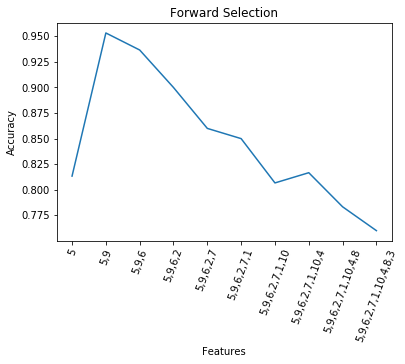

In [11]:
graph = plt.plot(forwardX, forwardY)
plt.xticks(size = 10, rotation=70)
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.title("Forward Selection")

Text(0.5, 1.0, 'Backward Elimination')

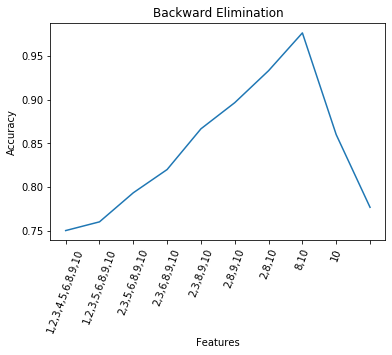

In [272]:
graph = plt.plot(backX, backY)
plt.xticks(size = 10, rotation=70)
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.title("Backward Elimination")